In [1]:
%matplotlib widget
import serial,socket,os,glob
import matplotlib.pyplot as plt
#import atexit
import numpy as np
import pandas as pd
import time, threading,sys,glob
from ipywidgets import interact, interact_manual,interactive,widgets,Layout
colores = (plt.rcParams['axes.prop_cycle'].by_key()['color'])
from serial import Serial
from tikzplotlib import save as savetikz

In [2]:
tunel_v = pd.read_csv('tunel_viento.csv',header=None)
D,L = [50e-3,350e-3]
rho = 1.2
deltaV, U = tunel_v.to_numpy().T
p1 = np.polyfit(deltaV,U,1)
UdeltaV = np.poly1d(p1)
dvs = np.linspace(10,60,100)
deltat = 1/80

In [3]:
dirout= 'medidas/'
files = np.sort(glob.glob(dirout+'Dshape_e75_L150_deltaV*'))
aux1 = np.array([filei.split('deltaV')[-1].split('_')[0] for filei in files])
#aux = pd.read_csv(dirout+'Dshape_e75_L150_deltaV1_0',header=None)
#fig,ax = plt.subplots()
#ax.plot(aux.iloc[:,3])

In [4]:
#refs
files_ref = files[aux1=='0']
for i,filei in enumerate( files_ref):
    A = pd.read_csv(filei,header=None)
    if i ==0:
        s0 = np.tile(np.zeros_like(A.iloc[:,3]),[len(files_ref),1])
    s0[i] = A.iloc[:,3]
    

In [5]:
#refs
deltat = 1/80
files_measure = files[aux1!='0']
files_measure_ref = files[aux1=='0']
for i,filei in enumerate( files_measure):
    A = pd.read_csv(filei,header=None)
    if i ==0:
        s0 = np.tile(np.zeros_like(A.iloc[:,3]),[len(files_measure),1])
        S0 = np.zeros_like(s0)
        deltaV = np.zeros_like(s0.mean(1))
    if len(A.iloc[:,3])<2000:
        s0[i] = np.tile(A.iloc[:,3],[2])
        deltaV[i]=float(filei.split('deltaV')[-1][:2])
    else:
        s0[i] = A.iloc[:,3]
        deltaV[i]=float(filei.split('deltaV')[-1][:2])
    S0[i]  = np.abs(np.fft.fft(s0[i]))
for i,filei in enumerate( files_measure_ref):
    A = pd.read_csv(filei,header=None)
    if i ==0:
        sref = np.tile(np.zeros_like(A.iloc[:,3]),[len(files_measure_ref),1])
    if len(A.iloc[:,3])<2000:
        sref[i] = np.tile(A.iloc[:,3],[2])
    else:
        sref[i] = A.iloc[:,3]
S0frec = np.fft.fftfreq(len(s0[i]),deltat)      

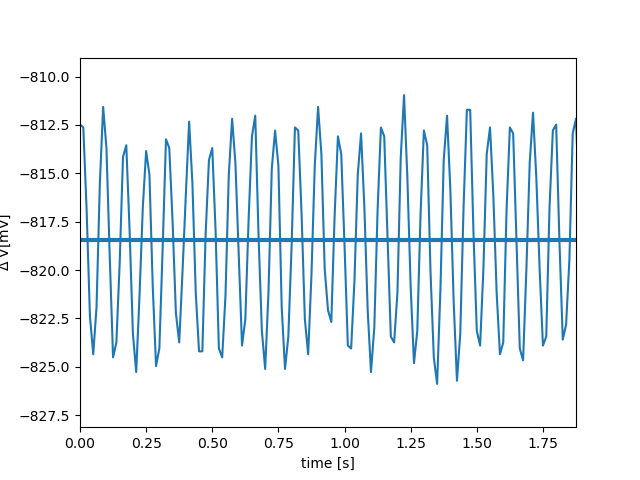

In [6]:
fig,ax = plt.subplots()
ts = np.arange(len(s0[i]))*deltat
l1, = ax.plot(ts,s0[0])
ax.set_xlim([0,15*10/80])
ax.plot(ts,s0[0].mean()*np.ones_like(ts),linewidth=3,color=l1.get_color())
ax.set_ylabel('$\Delta$ V[mV]')
ax.set_xlabel('time [s]')
savetikz('tikzs/signal_force.tikz')

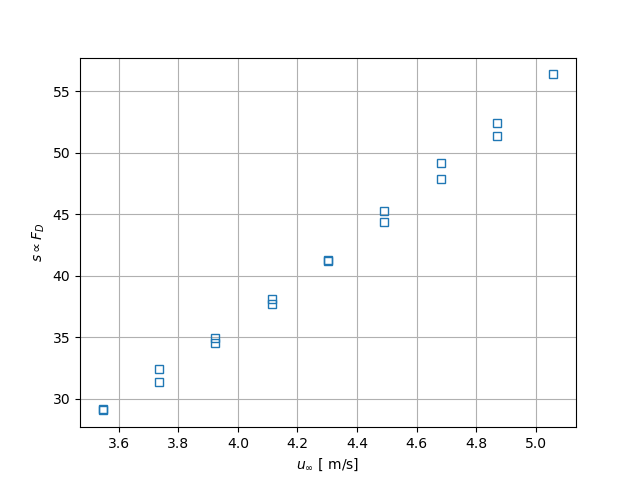

In [7]:
fig,ax = plt.subplots()

ax.plot(UdeltaV(deltaV),s0.mean(1)-sref.mean(),linestyle='none',marker='s',fillstyle='none')
ax.set_xlabel('$u_\infty$ [ m/s]')   
ax.set_ylabel(r'$s\propto F_D$')
ax.grid()
savetikz('tikzs/Fuerza_t_075_L150.tikz')

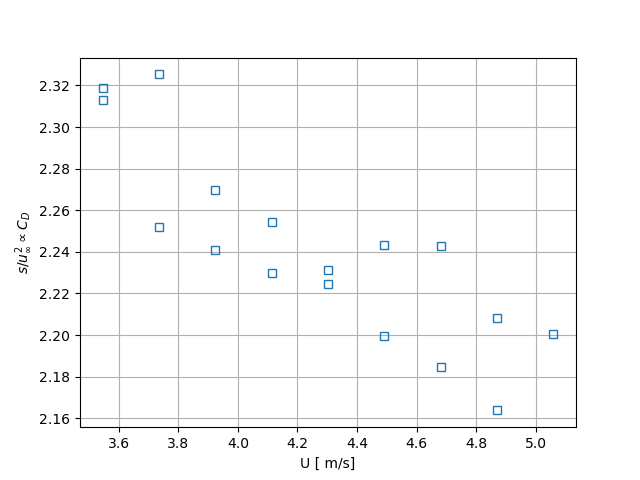

In [8]:
fig,ax = plt.subplots()

ax.plot(UdeltaV(deltaV),(s0.mean(1)-sref.mean())/UdeltaV(deltaV)**2,linestyle='none',marker='s',fillstyle='none')
ax.set_xlabel('U [ m/s]')   
ax.set_ylabel(r'$s/u_\infty^2\propto C_D$')
ax.grid()
savetikz('tikzs/CD_t_075_L150.tikz')

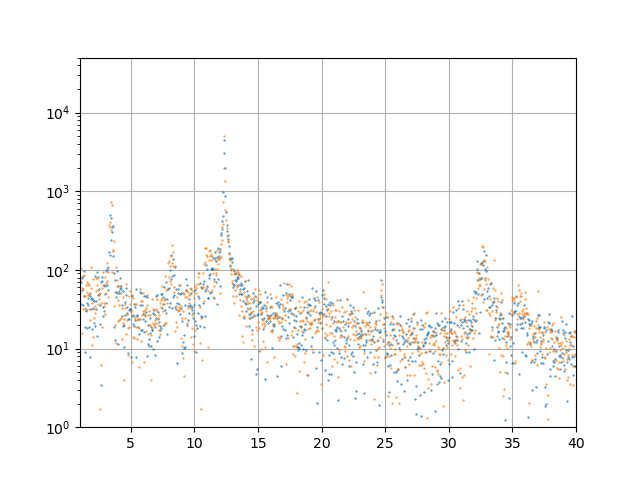

In [9]:
fig,ax  = plt.subplots()
for i,Si in enumerate(S0[:2]):
    ax.semilogy(S0frec,Si,'.',fillstyle='none',markersize=1)
ax.set_xlim([1,40])
ax.set_ylim([1,5e4])
ax.grid()
savetikz('tikzs/Fourier_t_075_L150_V40.tikz')

In [10]:
filei = 'calibra1/Dshape_e0_L0_deltaV40_1'
A = pd.read_csv(filei,header=None)
s1 = A.iloc[:,3]
filei = 'calibra1/refD_01'
A = pd.read_csv(filei,header=None)
s1ref = A.iloc[:,3]

In [11]:
UdeltaV(40)

3.5450000000000004

In [12]:
(s1.mean()-s1ref.mean())/UdeltaV(40)**2

3.6398829476347956

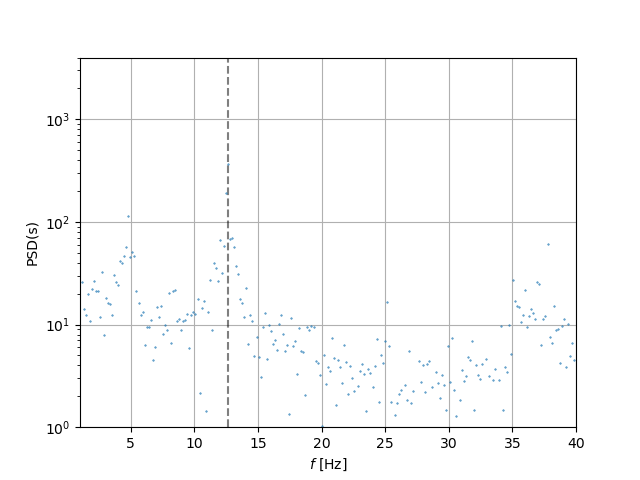

In [13]:
fig,ax  = plt.subplots()
S1 = np.fft.fft(s1)
S1frec = np.fft.fftfreq(len(s1),deltat)
ax.plot([12.67,12.67],[1,1e4],'k',alpha=0.5,linestyle='--')
ax.semilogy(S1frec,np.abs(S1),'.',fillstyle='none',markersize=1)

ax.set_xlim([1,40])
ax.set_ylim([1,4e3])

ax.grid()
ax.set_xlabel('$f$ [Hz]')
ax.set_ylabel('PSD(s)')
savetikz('tikzs/Fourier_t_0_L0_V40.tikz')

In [132]:
0.2*3.5/50e-3

14.0

In [105]:
rho = 1.2
L = 350e-3
D= 50e-3
Cd = 1

In [118]:
FD= (A.iloc[:,3].mean()-A0.iloc[:,3].mean())

In [120]:
FD*1e-2/(3.54**2*rho/2*L*D)

2.6104430855938916

In [178]:
# calibracion con Cd constante

In [17]:
lista_files = np.sort(glob.glob(dirout+'Dshape_e0_L0_*'))
lista_ref = np.sort(glob.glob(dirout+'refD*'))
A0 = np.zeros((len(lista_ref)))
for i,filei in enumerate(lista_ref):
    aux = pd.read_csv(dirout+'refD_01',header=None)
    A0[i] = aux.iloc[:,3].mean()


In [39]:
tunel_v = pd.read_csv('tunel_viento.csv',header=None)
D,L = [50e-3,350e-3]
rho = 1.2
deltaV, U = tunel_v.to_numpy().T
p1 = np.polyfit(deltaV,U,1)
UdeltaV = np.poly1d(p1)
dvs = np.linspace(10,60,100)

In [40]:
CDi,Ui = np.tile(np.zeros((len(lista_files),1)),[1,2]).T
for i,filei in enumerate(lista_files):
    deltavi = filei.split('deltaV')[1][:2]
    Ui[i] = UdeltaV(float(deltavi))
    #print(Ui)
    A = pd.read_csv(filei,header=None)
    FDi = A.iloc[:,3].mean()-A0.mean()
    CDi[i] = FDi/(Ui[i]**2*L*D*rho/2)

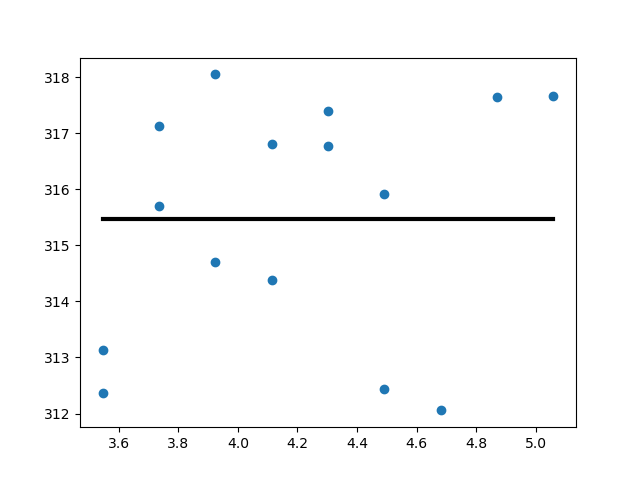

In [41]:
index_in = np.nonzero(np.abs(CDi-CDi.mean())<CDi.std())
CDm = CDi[index_in].mean()
fig,ax = plt.subplots()
ax.plot(Ui[index_in],CDi[index_in],'o')
ax.plot(Ui,Ui*0+CDm,'k',linewidth=3)

In [42]:
escala = 1/CDm

In [44]:
escala*1e3

3.1698069483716846

In [54]:
dirout= 'medidas/'

In [1]:
aux = pd.read_csv(dirout+'Dshape_e75_L150_deltaVtrans_0',header=None)
fig,ax = plt.subplots()
ax.plot(aux.iloc[:,3])

NameError: name 'pd' is not defined

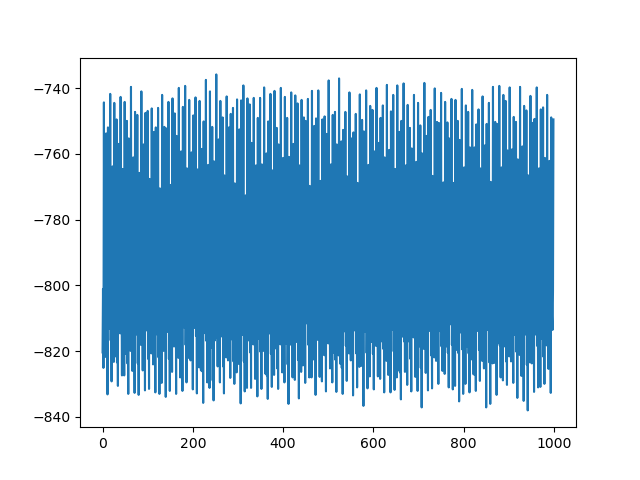

In [59]:
aux = pd.read_csv(dirout+'Dshape_e75_L150_deltaV56_0',header=None)
fig,ax = plt.subplots()
ax.plot(aux.iloc[:,3])

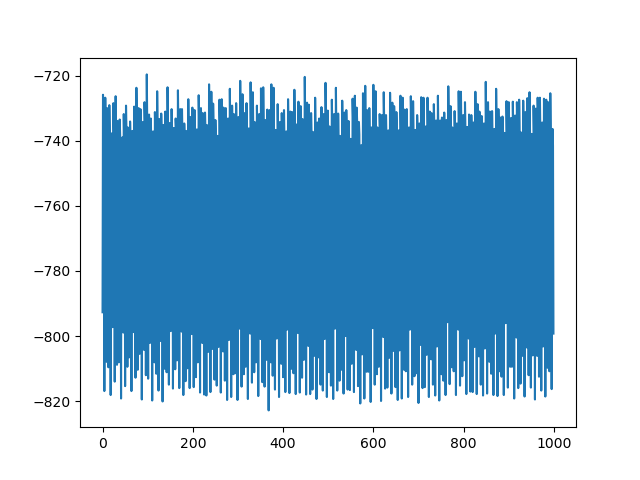

In [60]:
dirout = 'calibra_24_07_2024/'
aux = pd.read_csv(dirout+'Dshape_e0_L0_deltaV56_1',header=None)
fig,ax = plt.subplots()
ax.plot(aux.iloc[:,3])

In [66]:
10/(46/80)

17.39130434782609

In [51]:
125/76

1.644736842105263

In [52]:
0.2*5/50e-3

20.0

In [ ]:
2